In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [0]:
#loading boston datasets
df= datasets.load_boston()

In [3]:
#checking the boston datasets
print(df.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
#loading the data into pandas dataframe
boston = pd.DataFrame(df.data, columns =  df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#adding the target variable
boston['MEDV'] =df.target

**Data PreProcessing**

In [6]:
#checking for missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Exploratory Data Analysis**

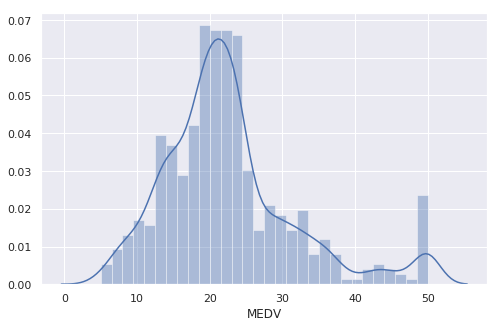

In [7]:
sns.set(rc={'figure.figsize':(8,5)})

sns.distplot(boston['MEDV'], bins = 30)
plt.show()

target variablle MEDV is normally distributed with few outliers


Checking correlation among the variables

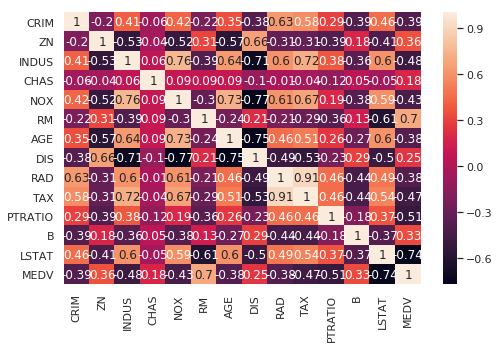

In [8]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)
plt.show()

**Observations :**
1. RM and LSTAT has high correlation with MEDV
2. RAD, TAX has high correlation (multi-co-linearity), as well as DIS and AGE

*Based on above observation we will keep RM and LSTATS as our features.

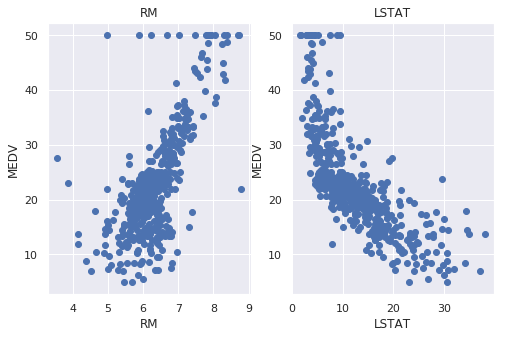

In [9]:
#checking how RM and LSTAT vary with MEDV 
features = ['RM', 'LSTAT']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observations :**


*   The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50
*   The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.


In [0]:
#Preparing data for model training
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT', 'RM'])
y = boston['MEDV']

**Splitting the data into training and testing sets**

In [0]:
#We train the model with 80% of the samples and test with the remaining 20%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [0]:
regr = LinearRegression() 

In [13]:
#Training regression model
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Model Evaluation**

We will evaluate our model using RMSE and R2-score.



In [14]:
#predictions on test set
predictions  = regr.predict(X_test)
rmse= (np.sqrt(mean_squared_error(y_test, predictions)))
print(rmse)

6.335681188102465


In [15]:
r2 = r2_score(y_test, predictions)
print(r2)

0.5796870223548949
